In [27]:
rows = 103
cols = 101
area = [[0 for _ in range(cols)] for _ in range(rows)]
bots = []
with open("input14.txt") as f:
    for line in f.readlines():
        pos, vel = line.strip().split()
        px, py = map(int, pos.split("=")[1].split(","))
        vx, vy = map(int, vel.split("=")[1].split(","))
        bots.append(((px, py), (vx, vy)))
    

In [3]:
def move_bots(time, area, bots):
    quad_counts = [0, 0, 0, 0]
    for bot in bots:
        px, py = bot[0]
        vx, vy = bot[1]
        new_x = (px + (time * vx)) % cols
        new_y = (py + (time * vy)) % rows
        area[new_y][new_x] += 1
        if new_y == rows // 2 or new_x == cols // 2:
            continue
        elif new_y < rows // 2 and new_x < cols // 2:
            quad_counts[0] += 1
        elif new_y < rows // 2 and new_x > cols // 2:
            quad_counts[1] += 1
        elif new_y > rows // 2 and new_x < cols // 2:
            quad_counts[2] += 1
        else:
            quad_counts[3] += 1

            
    return area, quad_counts

after100, quad_counts = move_bots(100, area, bots)
print(quad_counts)
print(f"Part 1: {quad_counts[0]*quad_counts[1]*quad_counts[2]*quad_counts[3]}")

[121, 135, 129, 104]
Part 1: 219150360


In [4]:
safety_scores = {}
def find_egg(max_time, area, bots,):
    for time in range(max_time):
        new_area, quad_counts = move_bots(time, area, bots)
        safety_scores[time] = quad_counts[0]*quad_counts[1]*quad_counts[2]*quad_counts[3]

find_egg(10000, area, bots)
min_safety = min(safety_scores.values())
min_time = [k for k, v in safety_scores.items() if v == min_safety][0]
print(f"Part 2: {min_time}")

Part 2: 8053


In [ ]:
variances = {}
def find_egg(max_time, area, bots,):
    for time in range(max_time):
        new_area, quad_counts = move_bots(time, area, bots)
        
        variances[time] = quad_counts[0]*quad_counts[1]*quad_counts[2]*quad_counts[3]

find_egg(10000, area, bots)
min_safety = min(safety_scores.values())
min_time = [k for k, v in safety_scores.items() if v == min_safety][0]
print(f"Part 2: {min_time}")

In [5]:
import numpy as np

def calculate_variance(max_time, bots):
    variances_x = {}
    variances_y = {}
    variances_sum = {}
    for time in range(max_time):
        x_positions = [(bot[0][0] + time * bot[1][0]) % cols for bot in bots]
        y_positions = [(bot[0][1] + time * bot[1][1]) % rows for bot in bots]
        variance_x = np.var(x_positions)
        variance_y = np.var(y_positions)
        variances_x[time] = variance_x
        variances_y[time] = variance_y
        variances_sum[time] = variance_x + variance_y

    min_var_x = min(variances_x.values())
    min_var_y = min(variances_y.values())
    min_var_sum = min(variances_sum.values())
    min_time_x = [k for k, v in variances_x.items() if v == min_var_x][0]
    min_time_y = [k for k, v in variances_y.items() if v == min_var_y][0]
    min_time_sum = [k for k, v in variances_sum.items() if v == min_var_sum][0]
    return min_time_x, min_var_x, min_time_y, min_var_y, min_time_sum, min_var_sum

min_time_x, min_var_x, min_time_y, min_var_y, min_time_sum, min_var_sum = calculate_variance(10000, bots)
print(f"Minimum variance time for x: {min_time_x}, Variance: {min_var_x}")
print(f"Minimum variance time for y: {min_time_y}, Variance: {min_var_y}")
print(f"Minimum variance time for sum: {min_time_sum}, Variance: {min_var_sum}")

Minimum variance time for x: 74, Variance: 392.6539
Minimum variance time for y: 19, Variance: 343.66086399999995
Minimum variance time for sum: 8053, Variance: 736.314764


In [7]:
import numpy as np

def calculate_clustering(maxtime, bots):
    clustering_scores = {}
    for time in range(maxtime):
        x_positions = [(bot[0][0] + time * bot[1][0]) % cols for bot in bots]
        y_positions = [(bot[0][1] + time * bot[1][1]) % rows for bot in bots]
        variance_x = np.var(x_positions)
        variance_y = np.var(y_positions)
        clustering_scores[time] = variance_x + variance_y

    return clustering_scores

clustering_scores = calculate_clustering(10000, bots)
min_clustering = min(clustering_scores.values())
min_clustering_time = [k for k, v in clustering_scores.items() if v == min_clustering][0]
print(f"Minimum clustering time: {min_clustering_time}, Clustering score: {min_clustering}")

Minimum clustering time: 8053, Clustering score: 736.314764


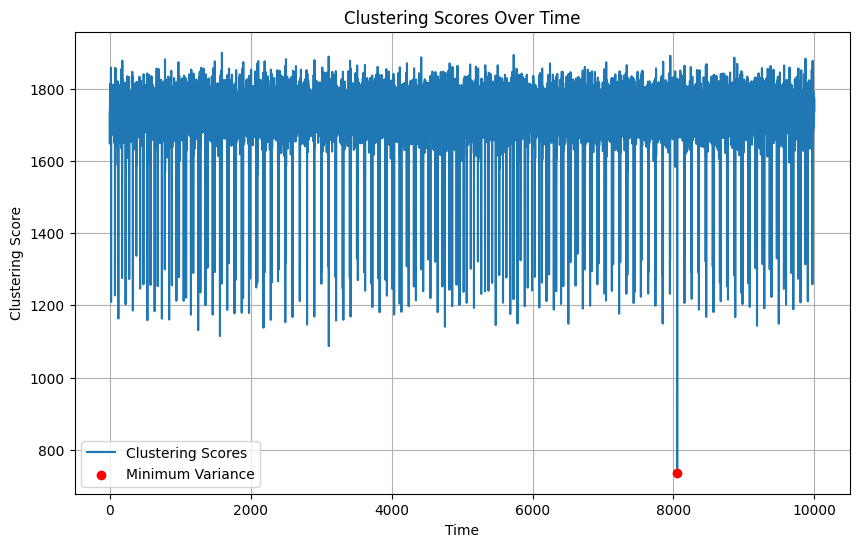

In [8]:
import matplotlib.pyplot as plt

# Plot clustering scores over time
times = list(clustering_scores.keys())
scores = list(clustering_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(times, scores, label='Clustering Scores')
plt.scatter(min_time_sum, min_var_sum, color='red', label='Minimum Variance', zorder=5)
plt.xlabel('Time')
plt.ylabel('Clustering Score')
plt.title('Clustering Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation
from PIL import Image
from IPython.display import Image as IPImage

import matplotlib.pyplot as plt

# Function to update the plot for each frame
def update(frame):
    plt.clf()
    new_area, _ = move_bots(frame, area, bots)
    plt.imshow(new_area, cmap='viridis')
    plt.title(f'Time: {frame}')
    plt.axis('off')

# Create a figure
fig = plt.figure(figsize=(10, 6))

# Create an animation
anim = FuncAnimation(fig, update, frames=range(1, 8054), repeat=False)

# Save the animation as a GIF
anim.save('area_animation.gif', writer='pillow', fps=30)

# Display the GIF
IPImage(filename='area_animation.gif')

In [28]:
import numpy as np
import copy

areas = []
for i in range(8054):
    area_copy = copy.deepcopy(area)
    new_area, _ = move_bots(i, area_copy, bots)
    areas.append(new_area)
    

In [29]:
areas[-1]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [50]:
min_var_sum

NameError: name 'min_var_sum' is not defined

In [ ]:
any_greater_than_one = any(value > 1 for row in area for value in row)
print(any_greater_than_one)

In [12]:

import sys
import time

W = 101
H = 103

ans = [0,0,0,0]

robots = []

st = 0
for line in open("input14.txt"):
    if line.strip() == "":
        continue
    p,v = line.split()
    px,py = map(int,p[2:].split(",")) 
    vx,vy = map(int,v[2:].split(","))
    robots.append(((px,py),(vx,vy)))

seconds = 0
while True:
    grid = [[0 for _ in range(W)] for _ in range(H)]
    seconds += 1

    bad = False
    for robot in robots:
        pr1,pr2 = robot
        px,py = pr1
        vx,vy = pr2
        nx,ny = px + seconds*vx, py + seconds*vy
        nx = nx % W
        ny = ny % H
        grid[ny][nx] += 1
        if grid[ny][nx] > 1:
            bad = True

    if not bad:
        print(seconds)
        for row in grid:
            print("".join(map(str,row)))
        time.sleep(0.3)


6911
00000001000000000000000001000000000000000001000000000000000000000000010000000000000000000010000000000
00000000000000000000000000000000000001000000000000000000000000000000100000000000000000000000000000000
00000000100000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000
00000000000010000000000000000000000000000000000000000000000000100000000000000000000000010000010010000
00000000000010000000000010000010000000100000000000100000000000000000000000000000000000000000000000000
00000000100000000010000000000001000000000010000000000000000000000000000000000100000000000001000000000
00000000000000000000000000000000000000000000000100000000000000100000000000000000000000000000000000000
00000000000000000000000000000000000000000010100000000000000000001000000001000000000000000000000000000
00000000000000000001000000000000000000000000000000000001000100000000000000000000000000000000000000100
00000000000000000000010000010000000000000000100000000000000000000000000000000

KeyboardInterrupt: 

In [18]:
t = [0, 0, 0, 1, 1]
print(t[:len(t)//2])
print(t[(len(t)//2)+1:])

[0, 0]
[1, 1]


In [41]:
from PIL import Image, ImageDraw, ImageFont

def grid_to_image(grid, cell_size=10):
    rows, cols = len(grid), len(grid[0])
    img = Image.new("RGB", (cols * cell_size, rows * cell_size), "black")
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()  # Use default font; adjust as needed
    
    for i, row in enumerate(grid):
        for j, value in enumerate(row):
            x, y = j * cell_size, i * cell_size
            draw.text((x + cell_size // 2, y + cell_size // 2), str(value), fill="white", font=font)
    
    return img


In [58]:
from PIL import Image

def grid_to_image_bw(grid, frame_number, cell_size=2):
    rows, cols = len(grid), len(grid[0])
    img = Image.new("1", (cols * cell_size, rows * cell_size), 0)  # "1" mode for 1-bit pixels, black and white
    for i, row in enumerate(grid):
        for j, value in enumerate(row):
            color = 1 if value > 0 else 0
            for x in range(cell_size):
                for y in range(cell_size):
                    img.putpixel((j * cell_size + x, i * cell_size + y), color)
    # Draw the frame counter at the top
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    counter_text = f"Seconds: {frame_number}"
    draw.text((10, 5), counter_text, fill="white", font=font)
    return img

In [60]:
def create_gif(grids, start, freeze_dur, output_file="output.gif", duration=20):
    sub_grids = [(sec, grid) for sec, grid in enumerate(grids) if sec >= start]
    freeze_frames = [sub_grids[-1]] * freeze_dur
    sub_grids.extend(freeze_frames)

    frames = [grid_to_image_bw(grid, sec) for sec, grid in sub_grids]
    frames[0].save(output_file, save_all=True, append_images=frames[1:], optimize=False, duration=duration, loop=0)

create_gif(areas, 7900, 100, "./bots_animation.gif")


In [54]:
test = grid_to_image_bw(areas[-1], 8053)
test.show()

In [18]:
areas[-1]

[[394,
  386,
  394,
  384,
  392,
  376,
  395,
  390,
  379,
  362,
  395,
  385,
  377,
  387,
  381,
  378,
  396,
  396,
  382,
  384,
  381,
  400,
  388,
  378,
  385,
  406,
  407,
  376,
  395,
  394,
  371,
  377,
  381,
  398,
  388,
  394,
  372,
  403,
  387,
  365,
  388,
  392,
  392,
  402,
  389,
  388,
  400,
  395,
  378,
  388,
  390,
  379,
  385,
  389,
  385,
  374,
  378,
  380,
  395,
  393,
  379,
  385,
  378,
  406,
  393,
  402,
  379,
  386,
  389,
  385,
  387,
  399,
  395,
  391,
  392,
  378,
  390,
  369,
  379,
  376,
  390,
  383,
  389,
  371,
  377,
  397,
  386,
  381,
  383,
  387,
  374,
  382,
  398,
  390,
  382,
  391,
  397,
  402,
  401,
  382,
  380],
 [395,
  384,
  393,
  393,
  386,
  382,
  406,
  399,
  407,
  379,
  376,
  384,
  384,
  391,
  381,
  403,
  391,
  381,
  391,
  394,
  379,
  413,
  377,
  412,
  388,
  370,
  388,
  388,
  379,
  391,
  386,
  378,
  384,
  378,
  397,
  381,
  371,
  390,
  390,
  382,
  383,
  397

In [21]:
area

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [61]:
from collections import defaultdict, deque
from fractions import Fraction
import sys
import hashlib
 
def md5(x):
    return hashlib.md5(str.encode(x)).hexdigest()
 
# sys.stdout.flush()
 
from itertools import permutations, combinations
# permutations(list[, r]) # r-length tuples
# combinations(list, r) # r-length sorted tuples
 
def gcd(x, y):
    while y!=0:
        x,y = y,x%y
    return x
 
def sign(x):
    if x>0:
        return 1
    if x<0:
        return -1
    return 0
 
# take 2d array, reflect horizontally
def reflect(a):
    return [l[::-1] for l in a]
 
# take 2d array, rotate 90 degrees clockwise
def rotate(a):
    n=len(a)
    m=len(a[0])
    return [[a[n-1-j][i] for j in range(n)] for i in range(m)]
 
# dirs in [4, 8]
# returns coordinates of neighbors of (x, y)
# in a grid where 0 <= x < xn, 0 <= y < yn
def neighbor(x, y, dirs, xn=None, yn=None):
    assert dirs in [4, 8]
    ret = []
    if dirs==4:
        dxy = [(-1,0),(0,-1),(1,0),(0,1)]
    else:
        dxy = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
    for dx, dy in dxy:
        nx, ny = x+dx, y+dy
        if xn is not None:
            if nx<0 or nx>=xn:
                continue
        if yn is not None:
            if ny<0 or ny>=yn:
                continue
        ret.append((nx,ny))
    return ret
 
# replace every letter of s that is in cs with a space (or anything else)
def strclean(s, cs, to=" "):
    for c in cs:
        s=s.replace(c, to)
    return s
 
# return only integers from a list of strings
def extract_ints(a):
    ret = []
    for x in a:
        try:
            v=int(x)
            ret.append(v)
        except:
            continue
    return ret
 
def isplit(s, delim=None):
    tokens = s.split(delim) if delim is not None else s.split()
    ret = []
    for x in tokens:
        try:
            v = int(x)
            ret.append(v)
        except:
            ret.append(x)
    return ret
 
def grid(dims, val):
    if len(dims)==1:
        return [val for _ in range(dims[0])]
    return [grid(dims[1:], val) for _ in range(dims[0])]
 
dat = """
##################################################
#...O.O#....O.O.O.#.O....O.#O.O.O.O.......O#O...O#
#OO......OOO........#...OO#O..OOO.OO..O....##....#
#O........O..O#....O.O.....O...#...O.O.O.......O##
#OO.OOOOO..OO..##.....O..........#...#OO.#O.OO.O.#
#.O#.....O..OOO......OOO...#..OO..#OOO.O.#......##
#..OO......#O..#O#O.O.......O..OO#...#O....O....O#
#..#.#OOO..OO#..OOOO..#....O.OO.#.O..OO..O.O..O..#
##....#..O...O...O.#.OO......#O.O..#..O.........O#
#.........#.O.#...........O.....O..OO..O......O.O#
#..OOOO..OO.#OO#..O..#.O.O#...O...#O..O...#.O.O#.#
#..O....#O#.O........O..#OO.OO....O..O#.O#...#...#
##.O..#..O.##O.O#OOO.O#..OO...............O#O#OO.#
#OOO...O...O...O......O..O..O..O..........#...O..#
#OO..##.OO.O..#..O.O......O....O..O..O.O..O.#..O.#
#...O.#.O.#O.#O#.O.#.O..O#O.O......O.........O...#
#..#.O.O.....O.#O.O.........O.OO#.O......#..O..O.#
#....O..O..#...OO#.O..#.....#......OO..O.OO.....O#
#...........OO.....O...O.O........O#.#...O......##
#...#..OO.OO....OO.#..#...O..OO.O......OO.#...O..#
#..O...O..OOO.OOO.O.......O.....OO.#...OOO..O...O#
#...O.O..#...O...#.O#...O.#...O....OOO.O...OO....#
#O.....O...O...O..##.O..#..O...O.....OOO##.O.....#
#..#...OO..OO.#....#..#OOOO.OOO....O..O.....O....#
#...O..OO...OO.O........@O....OO..O.O..O.........#
#...O....##O........O..O.#O..O......O....O....O.O#
#.....#...OO....OOOO.O.#O..O......O...#.O........#
#OO##....#..#O..O.OO#............O..#OOO....O.O.O#
#.O..O.....OO...#OO#OO#.#.OO.......#.O#.O.O..O.O.#
#.O....O.#O#..#.....O.....O....O.O......OO.O#..O##
#.OO.O.O....O.O..O#.O.OO.O.O........#.#..O...#..##
#.O##.#.OOO..O.##......OO...O#.OO..OOOO.........O#
#....O.O......O#..OO........O.O......O...OO.O...O#
##O.....O..#O.O..O#.O.O..OO.#....OO.O....OO..#..O#
#.O...OOOO.#.#.#.OO..O..#.O..OO....OO.......OOO..#
#O.O.O.OO..OO.O.O..O..#.....OO...O.O.O...O..O....#
#O..OO..O#O.....OOOOO.#...O#....O#....O.O#.O.O.O.#
#.O...#O#O.O..O........O#O......O...O..#...#...#.#
#.O....OO...O.O..O...O...#.........OOO#..O.O...O.#
#..O...O.O..OO........O....O............O.##...O.#
#O......O...O....O...O.#.....O.........O......OOO#
#O.O.#...OO....##..#...OO.#.........O..OO..OO#...#
#......O.OO..O..OOO.#O....#O.OO.O.......O....OO..#
##...O....O#.O..O.O....#..........OO.O...#OO..O.O#
#....##OO.O..O#.#...#..O...OOO..O..........OO....#
#.......O...........#OO..O#........O..OO....OO..O#
#O.....O..OOOO.O.........O#....OO...O.#.O.#....OO#
#....O.###...#.#OOO....OO.O......O...##.....#....#
#.OO.OO............#.OOO..OO.#OO......O..O..O.O..#
##################################################
""".strip().split("\n\n")
 
dat2 = """
 v^^^>^<><v<^<<^<v<>vv<<v<<v><^^<vv<>^<<<>v<>><>^>>^>v>>>>><vv><<v>>^<v^<^^vv><><^>>^^^>v<>><v^vv>>v>v^<v^>>^>^<v<vv^<v<>><>>^<<^><^v>><<>v<vvvv><v^<<>>>v<v^>^^><^^v^><v>^>><<^<<^v><^>^^v^><>>^v<<><<>>>><v^><v<>>v<<<>v><>v<>><><^<^>^>v>vv<<v^^>v^v^^>^>^><<vvvv>>^^>^^<>^v<v><vv>><><<v<<v<>>>>vv><>vv>v^<><<^>>>v^>vv<^<<>>>><^vv>vv^>^><^v>v>>v><^>^<^^<^vv><>>^<vv><>v^<^><<^vvv^<^<vvv<v^>^v>v>v>>^^<><><^><v^>><>vv^v><v><>^>><v>v<^vv><<<vv<<^vvv<^v^^^<v>^^<vv>v>v^^^^><vv>>v^v>v>><^<>v>^>^v<v<v^v>v^<<^v^^^>v<^^v<>^^<^<vvv^v^v<<^v<^v>v^v<^v^vvv^^<v>vv<^<<>v<>>>v<>^^^<>v<^^^<<^<<>^^<>>vv^<<vvv^^^<^^<vv^>v<>vv<v^><<<^><v<v^>>v><<<vv<^^>vv>^><<>v^>v<^vv>^v>v^v^v^v<>>v^><<^><<><>>v<>><<^^<>>^><>^<v>v>^><v^<>^>^v^<<<^^<<^v<>>v^v^v<>>>^>v^<>v<^<^>v><>><v^>>v<>>v>v<^v>^<><<<^^^vv<<<<<>v>^>v>><vv^>v><><<>v<<v<>v^v<>vvvv><><vv<^<^^>^v<>vv^^>v^>v<^<v^vvv^<^v<v<v^v>>vvv<^v>vv^><><v<<v<<<><^vvv^vv>v><^<v><vvvv>^>^>^>^<^^v^v^>^vv<<vv>><>>>>^^^^^<>^><v<>v<>>^<>^^>>^^^<^^v^<>vv>>^^<^<vvv<<<^<^<>v<v><v><^vv><
v^v<^<<<>>^<vv>^^<^^<<^<>><vv>^v>v^v<>^^><<vvv><<^<<<^<<>^^vvv<v^>^<^>>>>vv<^vv^vv<^<^v^<^^<><^^<><<>>^>>^vvvv>^<<<^v^<>vv>vv<^>vv^><^vv^<v^v>v^^^<<v<v^^>v<v>^^v<^>^^<vvv>v><<vvvv<<><>><<v>^^v<^>^^v>>^<^vv<v>><>v^^>^>^v<<><><vv^><<^>v>^<^<>vvvv^<v<>>vv^>^>^<v<<>^>^<^v>v<^^vvv^^>v^<v<^<v<v<>v>>^vv><<v<><<v><<^^vv^^<<>>>^^<v>>^^^>^^><^v<>vv<<<>^<^v<vv><<v<>v<>><<^>><<<>>v<^^<>vv<v^^v>^>v>v^vv^>^^^v<<<v^v<<<vvv^^vvv^v>^><><^><>^v^<^>>^<^<vv^<>^^<><><>v>v>>vv><v^^<v<<><^^v>v>v>^^<<^<<>>><<vvv<v><v<v<^<^<<^vv<^^<<<^v^^^>v>^>^v<>v^<><>vv<>^v>^^<<<^>v^v<<<>^>^v^^>^v^<>^<>v^v><>v<<v^^>><^v<vvvv<>^<v<><^vv>v>>>v>>v^^vv>>v>>^v>><>><>v><v<v>^v<^<v^>v<^<^<<>vv^^^>^<>>vv>><>vv>v^<^^<^v^v^>>^v<>v^^^v^><^<v<<<>v<><<<<vvvvv<v>v<<v<v<>>^^><<vv^><<^v<<^^vv^>>><v><<v<v>>><^>v>v<>^v<<v^v<>>^^>>>>v^><<vvv>>v><^vvv<vv^<<<^<><><v>v^v^>^v^<>v<^v><v>v<<v<vv^^>>^v^>^v>>^<<>^<^v^v<^<v^v^^^^^<>v<><^<^>>>v<<^<><>>>v<><>>^^^^<<>^><>^<><>vv^>>^^v^v^>>vv>^^<<>^<>^><<v<^vv^>v><>^^>^v^^<<><v>v^^^^>^>vv^>^^^^^<<^<^v<>vv
^^<<^^<^vv><><><^vv^^v^v<v><>^^<^v<^v<^v<^v^^>vv>>^^>><<^>vv^>^v^>v^v^<>><v^^v><><<v>v>^v^v<>^v<<v<>^^<vv>^>>^>>vv<^<v^^<v>v><<^<v^vv<v>>^<<>>>v<>v^^<<v<^v>vvv>>v<^^<v^>^v<v><>v^<vv>>^>>v<v^><>v^<^<><>vv<v>><^vv^vvv<v<>>v^>^>>vv<>^>>^<<v^>^>v>>v><v^<v<^^<v<v^><<^><>^<v>>><>>^<<^<><<<^v^^<>>^^>^<<^<<>vv<^v^vv>><><<<v<^>vv>^<^^<><^><<^<><<>^v^^<<v>^>v<^>v^^><^v^v<^<>^^<>>>>v^>v^v^<^^>><^<>v>^^^><^^<<vv^^<<>vv<v>v><vv<<^>>>^<<>>^v>>>><>^<^^<^>v<^^^<<vv^<v^v<<>><><^v><v^<v<v>^v><<vv^vv<vv^v>v>vv^><v>^v^^vv^v><v^<<<^^^>vvv<>v^v>>^vv<v>vv>^vvvvvv<>>v><><>v^<<>>>^<<<<vv<v<<<v<vvv<^^^vv<v>><^vvv^<<^>^>>>><v<v<v<><^vv<<^>^^^>v^>v^<<^^^>^<>^^vv><><<v^^<<^v^>>^>^>^><<^^^v^<<>^vvv^v>vv^>v^^<<vvv>^><>>>>^^<^v><<>vv<^v<v^<><>v<><v>>^<<v<v<<><v<^<>v<>><^v>^>^v>^^>^vvv^^^vvv<^<v>>v>^^^vv>vv><<^>v<<v<>>>vv<<>><><^v>><<<<<v^v><v^^<^v<<<vv<^^^>>>^v<<^>vv^^v<<^^^^>^v^>v>vv<>>>^<^<^^^v^^^>^vv><<^<<v>v<><<^v>><>>^^^>>v><v^><v^vv^<v<<v^^>v>>^<<<<^<v>^>^v>>^v<<><<<<>>v^>><vv><^^>>^v^^>^^>^><^^>^v<^v<^v>^v<^<>
<v<vv>>^>^<^>v<v><vvv>^v^^>^^v>vv<>^vv>v>^^<<<^^>^>>>^v>>^^><><v>><v<<><^>vv^<^<>v><>>^>^><v^>v>^>v^^<^^^v^^>v<<v^v><<v>vvv<><><v^<v>>^v><><v>>v<>^<>><>>v<^^<<<v>^><<v^>>>^^<>>v>>v<^<<v^<><>^<v>><v<v^<v>v>>v<^<v<^v^^<>>^<v><vv^<<^><<<>v^>^^^^<^v<v^v^>>v>><v^<><>^<>>vv>>>^^vv>v^>>vv>vv^<vvv>>v<vvvv><>^>v^^v<^>vvvv<v>>vv^<>>v^^v><vv<<^v<><^<vv>^>>>^^<<<v^^vv^<<>>^^^^>><^<<^^v<<>v<vv^<^<><>><<<><^>^^v>>><<v<v^<^v>>^^v>^vv<>^vv^>^>v>^>^>^^><>^v<<v><>v^^>vvv<^v^<^^>>^^><<v^v>><>><v>><<^v^^<<v>^v>v<<v<>><<>v<<vv>>>>><v>^^<^>v<^v^<<^v>>^<v^><>><^^^>>>^v>vv<^vv<^><^<>v^^v^v<><<>^^>^v^^<<<^<v>^v>^<<><v<<v>><<><vv^^^v^v>^<>^<^>^<^>^<><vv><^^^<v>v>vv^>v<^^v<<<^<<vvv><<^>v^v^<<>v^>^v<vv<^<v>v<<v^<<<>v>^>^<>vvv<><>^<>^<^v<<^>vv>>>v><v>^^vv>^v^>v^v^^^>^^v^>v^<>>v^>v^<v>v>^>>vvv<^v>>vvv<v^<^^vv>><^>^><vvv^<<<^v>v<>v^<^v>>^><vv^vv>^<><><><>^^v^^^>><^>v<<vv><><v<<vv<>v^v^^><<^^^v<v^v^>><><<>>v<^v<<<v><<<^^><>>><v<<>v<v>>>v>v^^>v^v^>>v<><>v^>^^<>>v<v>>v><<<>vv<<><^><>^^>>^^^<>v>><>^>^^>>v><v<<^v>^<v<<<<
<<^v<<^>^v<v><<v>v<<<>v^>v>^>v<^^<vvv^^>>v><v<>^v>>^^<<<<>v^v^v>>>^^vv^^^>v><<>><^^>v>v^^<^vv^^vv<^v^>><^<v^<v^<<<>v^^<v^vvv<^<^<^v>^>>>v>v>>v>v<<<><<>><>>v^<v>^><>^v<>>^v>><<vv^>>v<vv<^<^^^<<<<<v>^v<>^<v>>vvv>>v<<<<<<<vv>v>^>>>^<^>v>><v^^<^><^^v><>>^<><vvv<^^^v><<^>^><^<<<<v<<>v^>v<>^<^<>^^<>>><<vv<vv><^<vvvvvv<^^<^v^<^vv<<>>>>v<v^><^v<<vv^<>>v^vv<v>>v>>^>vv^<<^^>v>>^v>^>v^^<v^><v<^vv^>><<>^^>>^v^v^vv^^<v>><<<<^>>v<<v>^v^>^>><v><<<<<^><v<<<v^<^><><v<v>><v^>>>v<<><^>>><vv>v>>v<v<>v>^^v^>>^v^v<^<v>>v<<<><<>>>vv^v>^^^v<>>>^v^v<<<^>^>vv^<^>><^^<v<<^^vvv^<<v^><<>v>^v^><><^>^^<><>><>^><>^>>>v^>>>^^^^v<v<>v><vv<^<<>>><>vv^<>v><v<<v^<v<>^<v<>v^>>>>v><^>^<>>>v>>^v^<^v>^<<<v><>><>>^^v><>>^v<^>^^>^^>><^<^^v<v^<^v><^<<^<><<>v^>v^<>^<<vvv^^<>vv><v><<><^<^v><vv><<<><>v^v<vv>>>^v^<<>>>v^<<>>v>v^>><^<>^><^^^>>^<^^<>^v^^>>vvvv<^<<^^^v><v^v^vv<^^>>>>v^v>>>vv^<v><v><v>>^^^<<<<<v<^v<>v>^<>^>^><>v^<<v<v<>v^<vvvv<<v^vv^<^^^^>>^v<^v<>>>v<^<>>^^v<^^vv^<v^>v^v^^v<^<<^>^v^><v^>v<v<^<v<<v<v<vvv^vv^^v<>vvvv^<v<>
v<<<>v>v><v^v<v<<^v><<<vv^<^^>>^^><vv<>><<v<^<v>vv>v<<^^<v^vv>v><vvv^<^>^v<>><^><^v^<><>vv><<vv>>^^v<vvv^>v<>^<v<<<<^>^>vv^>^>><^v^v>>>vvv<<>><v><v^>^v^^>><v<^<v<^^<<>^^^<>^>v>^^>>^<<^^>^>v>^<><v>^><^<<v><^^>v^vv^v>v^vvvv^><^^<v>>v>^v<><<<v><v^<><^>>^^v^v>>^^vv<>>><v<^<><>^<^<>^^^vv>^v<>^><>>^>vv>>><v>>v^^>^^<<^^<>>><^<v^vv<^^^><>>>^<^>^>>>v<^v>>>^^<<v<>^>^<<v<><>^>vv><<^^>v>>v>v^^<>^><>>^^>v>^^<<^>><vv><<^^><^>v>^vv>^>vv^<v<<<^<>>><>>^vvv^^^>vvv^^v<<<^^v>^v^<<v>><<^><v>v><>v^vv>v>vv>>^<^><^^>^>vvv<vv<>^>^>>v><vv>><v^v^>>>>^>>><v<v><<^>v^v^vv^>><^^>v>^>^v<v><>v<>v>^^<>v<v>^>v<>>^vv><>^^v<v^>vvv>^^^vvv>v>>^>^<<^<v^<vvv><^<^><^>vv>vvv<<vv^<vv>>v>v^>v>^<^v<v^<<vv^>v>>^>v>>^<<v>^>v>^^>>^^^>v<v^^<>>><><^<^<^^vvv<<vv>^^^<>v^<^vv>v^v<v^<^>^><^^^^<<<<<^^<<>^>vv^v>vv<^<>^>><<^>^v<<^<>v<vvv^^><v^<^>v^^v<<vvv><v<^<^<^>^^><v><v<^vvv<<^<>v>v^^^<>v<<>><^<><><^><v>>><v><v<>><^>v^><<v>>v>>^v<v>v>v^>><vv>>^<>>v<v<<v^<vvv^<<<v>v>v>>><><>>^^>v^<<>v>v^^>^<v^v>v^v<>^>v<^<v^<>v<v><><<<<>v^>vvvvv>^^^>v<<^>^^
>>^<<<>vv<>vv^vv<^v>v^v>><vv^><<^^>vv^<vv^v^v<>>^^v<>>^v<>^v^<^v<v<>v^<>vvv>>^>>^^v<>>><v>^^<^<^v>^>v>vv<^^^^<<><v^^^^vv^^>>^^^<vv>^^<<>v^^^v<^>vv><^><^<><<^^>><<<^^^<<v<<^<^>vv>>v>><>^>><vv><<^<vv^^>^^>^<v>>v^^>^v<>vv>>^>^v>v<><v<<<v<<v<<v<v<>v^>>^>^vv><>v>v>v<v^^<v><v^^^>>^<<v>^<v^>^<<>v<^v^<^>^v^^^<^vv<<vv^<<^>^<><>^<v<^^^>vv^><>vv^^>><<^v<vv>v><<^>v^^v>^^^^^>^<<v^^^v<<^v<>^vv^v^<><>^>^v^v<^v^><>^<<v<>^>v<^>>>^v<vv^><>vvv>v^<^><<^^<^^><v^<>v^><>v><^>v<^v<v^>v><<^<v>>v<<^<>^v^v<v^^<<v^<v<><>>v>^<^^>v>>>^>v<v>v<^v<>>><^>^^>v<>v><v>^v<v<><v^>^^vv><<><^<^>vv><^v^><<v<^v^^^>^>^<^>vv>><vv^v^^^vv<^vv<><v><><<>^^vv<<><><<^v><<>v^v<^^><^^>v><v><vv>>^<<>vv^v>v>^v>>>^<v>>v<^^^>^^>^^<vv<^v^^>>v<^^v><<<^^>v^>^^>^^>v<>^><><^^^v>^>^>>^<>>^^<v<>v<<v<v^<v>v>v>^<v<^^>><<<^<<^v<^^vv<>>>vv^^>^v^^<<^v>v<^^>^v^^<>>^<<<<>^><^v<>>^^>^v^>><<><v^vv^^<v^>^^<v>><>v<<><v><v>^>vv^><v<<vv<>v<>>vvv<<<<<>><v^<<<^^<<v<><v>><v^^<<v^^>>v^^<><<v^<><vv<v>^^^<<<v^<<>>^^<^<>>>^v<^^>^v^>>vv^<v<<>vv>^^<<>^<^<<v<<><v<>v^^>^<
^<<v>>>^>>^<v<^>^>v^v>v^>>^^^v<v>>^v<v^^v^^vv>^>^^<><<<vv<<^<^^><>>^^<vv<^v>>^<<^^vv<v<<^v^^>v>>vv^v<<v^v<^v>^>v<<>v^<^v>^><>^^><^<v<<^^^<v<>^v>>v<<^vv<<><v<>v<>>^^^v^v^v><><^^<vv>v<<v>v^<^>^>^vvvv^^><>>><><<vv^^>^>v^<v<^v^<^<>^v>^v>^^>^>vv<vv^>><<^vvv<>>v<v<^v^<^>>v^^^<<^>>^><^>^v<v>^><<><^^v^^v<v^v><^<^>>^v^^v^v^><v<v>^><><<<><<<<v^v>^v><^<>v^vv<>>vv<<>>><<<<<v>^v<>^<^<^><^<^>^><^^v<v<v<^>^>v<vv^^v>><^v<<vvvv^v^><vv^<v^><^>^><^><^^vv<^v<<<^v^<><^^>^vv>^<v>v^^v^v<>><^><<<^^v^^>v<vv^vv><>vv>v>v^vv>^^<<v><^<v^><>><<^^<>>v>>^>v><<<<^^vv^<>^^>v>vv>v>v^>vvv><v^><<^vvv^^>v<<^>>^^<v>><><^^><v<>v<^><v>v^>vv^<^^<<<^>^^^>>v<>vvv^v<v<^v<v>^><vv^<v^vvv>vv<>^v<>>>>^>^<<<>>^^^>>><^<vvv<><vv^vv>v><^<>^v>v^^<<<^^^^v>^>>^vv^<vv^^^<v<v<^>v>>^>v>>>>>>^v<vv^<<>v<<<>>vv<v<>^^<vv^<^^<>>>v>vv>v^^<^vv>>vv>v<<>v<>^v<<v>vv<<>>v>>^<<>^^^<v<>>v<><^>^<<<<>>v<<>>^^>v>^>>^v<v>^>^>v<^<<<v><<<^vv<<<<v<<<>v^^<<>>v<^>^^>>^v<<<^><v^^>>^v>^^>v^>^<^v>>v<<<v<^^<>>^>>v><^>v<v>^>^^v^v>v<><^vv<<<^<>><v<v^^^vv^vv>><<>v>^<^<>v^
v<<^<>^>><>vv^^v^>>>>vvvv<<<^><v>v>vv^><<^<<^<v^v>>>>^>>^^vv<<v^^^>^v^<v>>^<v<v<^^>v<^<^^vvv>^^<<<<^><^vv^<v^<vv<vv^>^^^v<<>>>vvv^^<><<><v>^>v><>v^^<>^>>vvv><<<<v>vv<<^>>>^vv<v><<v>>>><<<<^vv<^vv<><v^^^^>>v^^<>^v<^^<<v^v>>^<<><><vvv<><>v^>>^<vv^><v><^^>^vv>>><^<<>v<^^v^^vv<<<^<^^v>vv>^<^>^^^^><v>vv<^v^>>^<^^<<^vvvvv^^>^>^>vv^^v^v><<^<<>>vv><><>v^><v<^<^<<>vv<<v^<^<>v^v^<<>^^<<<^<>v^^>>^<>vv<<v^><v^^>^>v<>^>^<>v<><v<<<vv<^v^v>v><^<>^><^<vvv<>^v<<^<^<<><^<v>>v>^v>^v<>>^v<^^<<>v<^>^<^v<><><><^>^<>^>vv>>>^v<vv><<v<><<>v<<<>v^<>v^><<^^v<v<><^^^^v>>v>^<^v<^^<<>^^<<v<>v<>v<>vvv^>>v>v^<><<^>vvv>>^>v^v><<<v^>^^v<<vv<>v^^<vv^<<^^<>v>^v<^><vv>^v>v<^^v>>v>><<<vvv>v>^>>><<<>^>v>^<v<^^^<^^><<<^^<^v>><v><<^>>>vvvv<><>>v<v^v^><<^>^><v>>vv><<<<^v>v>>>v^v<><^^><v<v<v^v<<^^v>v><>>>v^>v^<<><<^>v^^v<>^^^>v^^^<>v<<v<>v<>>><>^<^<>v>^vvv<><v>>^^>><<^^<v<<<><>>>>^v>v<v><^v<<^<<<>><v>v<^>^<<>v>v<<v^vv^>vv^>v>>>^v>v>v^vv^^<v>><><^<^><>^v<v>vv^vv^^<<v<v>><vv>v<^<>v<>^vvv>v>>vv><>^^<v<>><v^>^^^v^v<<^v><v>>^^>>>v^^
<<^<vvv<v^<^vvv^<^<><<<<^<^>^>>>vv<<<<>>v^^v^><>^>v<<^<<<v>^<^<>^vvvv>>v^><^>>v<<^^>v<>v>^v^>>^>v>vv>^<<>v<v<^>v^>>v<^<v^>>v^>^^v^>><<<^<vv<>v^<^<^<<<v><^v>>>^v^>v>>^<v>v>v>>vv^><<^<v>^>>>^v^>v<<v>^^^>^v>^>^^^^v^v><<<<^>v<<>^v^vv>><^^>vv^>>^^><<^v<>v<v>^^^vvvv<>^>>v^vv>^>v<<^<<^vvv^>^>v<^^>><^<<^<^>vvv^^^^vv><>^<>^vvv<^<<v<<vv><<><>^<^>^>v><^>>^>^<v<^<><<v>>>>^^<v>>>><>><vv^^<^^^><v>^<<>vv^v<>v^<>v><>>><v<v^>>vvvv<vv>>^<vvv><^v^<<>^<vv>^>^<>^>v><^><^<v^vvv><>>>>v<v>^<^<<^>><<v>v><><><>v>>vv<>vv<v>^v<>>v<^<^><v^^>>v><v^>v<^>vv^>><>^^^<>^v>>>>>><<>>><>^>v^<^<^vv><>v<<^<<<><^^<<>v^v<v<<^<^<^<^<^v^vv><<><<^<v^^^>^^v<<v><<v^<<v>>>>v^^<<v><^<>>v>v>^vv>^vv>>^<^>^<>^^><^^><v><^v>^<vvv<><^v^^<vv>^^^^^>^^><vvv<v>^>^^<^v^^^^>^^<v>v<^<v>v^v<<v><v^><>v^^<v<^<<^v<vv^><><>><^vv>^v^v<^<v^^^<>v><v^^<<^^<^>v>v><<^<>^^><><^>v>vvv><>^^^^<><vv><vv>v^>><^v^v^>v<<>vv<^^v><v<v<v>^^<>>^>><^>^<^>v><vv^<^v^^<v^>>vvv^^v><<>>>vvv>^vvvvv><vv^<>^v^v<v><<vv^^><v>^^v<^<<<^vvv<<v<<^>^v<^v^^>^^v<>>>v^<^^><^<^>>>vv^^><^>
>^^>^v^>>^^^><v>>^>v^<v<<v>^v><vv^v><^^vv<^<><^>>^>v>^^^v<>><v<vvvvv>^>><>^><^v^<>v>^^^<<<<v><<<^<^<^>v><^><<v<>^><<<>^><^>><>vvv^<<>>v^<v^>v>^><v<v^^<<>vv^<^<^<>^^<>v>>^<<<^<<>>>vv^v^v>^v><v>^<<vv<vv^^>vv>v><v<><<vv^<>vv<v<<v>v^vv><<<>><v><>>^^^^<<v^<^><<vv^vv<>v><^<^^^^>^v^<v<vv^^<<^^>^^>^>>v<<<>^vv^vvv<v>>^v>>v>vvv<>>^v^<^>vv^>>>v^^>><v<^>>>^v^<v><v><<>>v<>v^v<<v>>>>>><v^vv<<>v<vv>>vv<^>v>v^><^vv^v><<v^v^<^^^^^<^>^<>v>v<><<<>^><v>vv><><v<v>>^v<v^>v^<<^^v^^>v<vvvv^<<^>>><^v>^v>^v^>>><>v^><^^^^^^<<^>^^>^vv<^><>v<vv><<^v^v><><>^^<^^<^vv<<><v<^>v>^<v>v<>>>^<v^^v>>vv^<vv>^>>>v>^^v<^^v><>^><>>v>^>>^>vvvv^<<<><v^^<v<<v^^><>>>>v^v^^<><<<<<v^^^v<^<<v<^vv<^>^><><<<^>>vvv>v<v<^v>^v>>vv^vv<>><v>^^^>^^^v^<><<<^^^vv>v>vvv<>vvv<v^>v^v^^v<>v<>>vv<^v^>v^^<^vv^^>><^><^^<><<<v<v><vv>v^^>^^^<^vv>vv^v>>^<vv<><>>^^>^v^<>>^v<>v>v<>v<<v>v>^>v>v<><v<^v<^<v<<<><vv<>vv^v><^^<v^v^^vv>v<>v>>><>>v><^<<><<>><v>vv<^<<vv<v>vvv<><>^vv<v><^^v^>><v>>>v^>v<v>>vv<<v^>>>>>v>^<>^<^>><>v<vv>^>vv<^<^v<v^<<vvvv>^^<<v^<vvvv^v
<^<^vv^>>>^v^<^<^>^^^^>>v<vv<><v>vv^^v<<v^v<^vvvv^v^^<v>^>^^>>v<v>vv><<<^^>>>>>vvv><v<<^^v^^v><>^vvv<><^><<>^<v<<>^>>v<<>v><vvv<<^^^>>v^<<^^v^v>>><>v<<v^^><<^<vv^<v>^v>><><<<v^>>vv^vvv<>^>v<<>><<vvvvv>vvv<^>>>v<<^>^^v>>>^>^>^^^v^^^<^<^^><><<>v<>^<vv<<>>v<^vv<><v^^<>>^>^<^><>v<<<v^<v>^vv>^>vv^>v<>>>v^<>><<><v^v^<^vv^vv<<>^<<v>><v^v>^^^^><v><<>v>^v<>^<^<<v^>^>><<^>><>^>vv<v><v>>^<v^>v>>v^<><<>^<^<>v^^v<>v<>v<<v<>>vv^^vv^<v^^^^vv>^<<><v^v<<v>^v^v^v<<>^^v><^v>><v^^<<<^<<><>v<>>vvv<^>vvv>vv<v^>>>>>v^>v>><v>>^>v<vv<^v^><vv<^v<>>v><^><>>v<^<^<v><v<<^^^vv<>>^^^<>vvv>>>v^<><v>^v^>>v<<^<v^<^^<>^<>v<^>>><>>v>^vv^^<<>^^<><>>>v><>vv<<<<^<<^<v><^>v>><<v^v^vv<v<<<vv<><v>>v^<<<^<<><vv<v<<>^^<^^>^v>v>><<v<^vv>><<v>v<<^<<^v>><^<>>^^v<>^>^<>v^>v><vv<^^^^>>^v^v>vvv<v>^v>><v<<^vv>^<<^<>^<v^>^v<^<vv>v^^v><v>v>v<v^vv<>^v<v^v^>><<<<>^<v<<>>v>><^>v>v^^<^^^vv^>>vvv>^v>>>v<<^^>^<<<<^vv^^<>^v^<<>^>v^<v^<<vv>v>>vv>vvvv<><<v>>>^<v><>>vv><^^^<^v><^^<vv<<<>^<v^<^^v>^>^^<v>>^^vvv<<^^>vv>^^>^<<><^^><v><>><vv<>>v^^>vv^<
^>>^<<<v>^<<><v<<^<^>v<v><>^^v^v>v>^v<>^>vvvv<>><<v<^>^<>vv<>^v>><<^^v<<^>><^^^>^>^<>>v<v^^vv^v^>^v^^^>^<v>^^>>^>v>^>^<<^^<<<<>><^^^><<^>^^>^<^^>^>vv<<^<v>^><vv>vv<<<<v>>>><v<<>>>^^<><<><>^^<v^>><<^>^v^^v^<^<^>^>v>^>vv>vv^<v>^^^v>>><<^^v^^^>^><^><v><<>^>^<<vv>^v^>><<v>>>>^^^v>>v^v<<v<v>>>>>>v^>v<v^<><><v<<^^vvv>^^<v<>>>>^^>>>^v><^<^>>>>>v>^vv>v<<>^vvv>^v>^<>v>vvv^<v<v<v><>>><^><<^><^v>v>^>>v<<^<vv>vvv><^<<^^>^^>^v<^v^v^^<^<<^><^<^<><<^<v^v><v><>>^><^<>v<>^>^v>^^vv>^v<>><>vvv><<>^^^v^>><^^^>><<^<<^<vvv>><>^^v^v<^><>^<^<<v>^^<><v>^<<><v<><<^>>v>>><<>^>>vvv>v<v^v>^v^v^^<^v>><^<<><v<<^>>^vv>^<v^^<^v<^v<^<<v>v^>v<v<vv^<>^v^><<<^<^^v^v<^vv>^v^<v^v>vvv><v<v<<^v^>^^><>v>>v^<<>^<v>><^<>vv>^^^^><<>^>^><^<<>vv><v^<^<v<^vvv^^<vv^<^<>v<^v>^><<^<<v><^<v>vv^v^>v<>><^><v^<><v<^^v^v<^<v><><<<^vv><>>^>>v<>v<><><^^<<v>v<^v^v^v^^<><v>^<^v>>vv<^<v>>^v^<vv>>>^><>>^v^>^^<^^<v^><>>^>><^v<>^^vv>^<^^<v><<vv<v<<<<vv>>^^>^<^<<<^<>vvv^>>^v^>^<<^^v<vv<v>v<^^><<<^<>^><<^>v<v<^vv<>>v<>>>^<>>v^^v<^<v^<v>v^>><^v^<>>>v>
^>vv<<>v^^^^^v^<^^><^>><>^>>vvv<v<v<<v>>^>v<<>v^^vv^<<>>^^><>><^>>>><><vvv^<>^^<^v<>>^^^^^v^v^vv>v<v<v>v>>><<^<>>^<>v>v<<^<>^>^v>>^<<vv>v>v^v<<^>>><><<^v>^>^<v>^<<><<^^>>^^<<<>^>>>>^^><vv<v^^>>^<>v>v><^^v><vvv<<<^^<>>vv^><<>^^^^v<v^<<>v>^<><vv<^vv>><^<^vv<>^>v>vv>^<vv<<vv<><<v^v<^<>><>>><v^^vv>>^>>vv>v>v^^>vv<v><^<v^vv<<><v>>^^^>^v^^<^^v<>v<v^^><^v>>v>>vv<><^^^^<>><<<v^><^^v^<^v^<vv>v<<v^^>vv<>><^^<>v<<^v^<v^vvvv<vv<vv<>>v<^<<>>^<^v^v>><<^<v^^^>v^<^vvv^>^v^v^>vv>^^>v<<vvv^<^^<<<^<>><vvv^^>^<><<^v^vv^<><>><>^v^v^v^><<^v^>>^>^><>>v<<^v>>>vv^^^^<<^<^>v>>v>>>v<>>^^v<v<<^vvv>^^^<^<>><^v><<<<vv>v>>v^vvv^v<^>^v<^><<vv^^>>><^<vvvv^v<<^^^<<<<v>vv>vv^>^^>>^<v<v^>>^^>><>>v>>>>>vvvv<>^<>^^<v^v><<<>v><^>v><vv<^^>><v<<^<^v>>^^>><<><><<<^>^<<^<^vv>^>>><<^<vv^vv^<><^<>>^>^><^><v<v<<>^^vvvv^v^^vv>^>>>>vvv>v^^^^v<^>>^^<^<^<>><v^><>>v>^v^><^^v>><v<>v<vvvv<v><<^^>v<<<v<>>^<^>vvv^v<><v<><>><><^<vv>v>>>><<><^<<vvv>vv>>^>vv<>>^v^>v^>><<<>v>>^<<^^vv>>v^<vv>vv^<><<v^v<<<v>v<vv>v><^vv^v>^v<^^<<^>v>^v><<^<^^<<v<
^>><>>v>^v<>>^^>v<v^>v>v>v>vv^>>^<>>^<><>v>v<<v>^<^v>><v<<^^v><<<<>vv><vv>^>><<^v^<^^^<v^>vvv>^>vv><v><<^<vv>v<><v<^v<>^<vv^v><^<>^v^>vv^^>>><><vvvv>^^><v^>>><^>><vv<^^^>>vv^<<<<<v>>vv<v><>>v<v><>><^^><^><^v<^>^<<^v^>>><>><v>v<><<v<^vv^^<><<<>>v^>vv<v<>v<^><<v>^vv>>>v<^^><><^^^>^^<>^v<<<<>>^^^<>^^^vv<>v<<>^<<^v><^>^^<^>>>v>v^v^vv>>v^>v<v^^<<<^><^v^v>>^<>v<<<^><<<><>vv<^v^^<^><v^<<<<>^^<v^^>v^v<vvvv^<^>v^^v<<><^v^><^^<>>^^>v><vvvv^<><^vv^vv^v<v^>^^^><^v><v^<v>^v>^v<^^<vvv><<v>^^><^vv<<^<^v<^^^>v<v^^>^><v^>^>vv><>^^>>^v<<^^v<^vv<^<v<v<><<vvv^>v^^v^v^^<><^v<^v>vv^vv>v^^v<>v>>^<^^^^<<^v>><<v^<>^vv<v<<^>^^v><>^vvv<>^v^>v><v<^^^>v<>vvv<v<<<v>^>v^^<^^^>v<><v^<v>>>>^>v<vvvv>v<>><v^><<<^^^^><^vv^^^<^v>>^v<<<><>>^vv^><>>^<><^^^v^<<>^^^<<<<>^><^>^<^<<^v><<><>vv<vvvv<v>^v^v^>>^^^<vv<<<>>v<<>v^v<>>^<<^v>vv<<><<v<^<>^^<<<v<^v^^>^>>vv<v><<^^^vvv><v<^<>>v>>>>>^>><v<>>^>>>v^>vv><>vv<v^><v<><>><>v^>^><v<<v>^<v<<<<<vv>>^vvv^>vv<^<>^<<<v^<^>^v>>^vv>><^<<>>^<<v<^<<>v>^v<><<>><<>^<^<>v><<<<v>>>^<<v<^>v^^v^v
^<v>v<><^>^^<v^>^^^<<>^v^^<^>>>v>vv><^^<v^<v<<<<<<v<vv>>v<^v>^v<>v^^^>v>v><>v^><<<>^>>vv^v<^><^v<><vv^vvv<>>>^>><v>>^^v><^^v><<^>vv><vv^v^><>v^<v>v^>^<vv><<vv^<<^v<vv<^^<^^^<<^>^v>>v>v>vvvvv<<^<^<v^<>>><<><<<<^^^><^v<<^<^^>v^v<<v><v<<^v<v^^v><>vv<<>vv<>>><v^<^<^^<<vv><<^v^<v<v<>^^^vv<><v<>>^>vv>vv<<v^^v^vvv^^^v<<v^>^<<<>^<>vv><>^^v<<v<^v<>>>^^>>v>^<v^v^vvv<<>v<<<<^<<>v<<v<><<^>^^>^v^<<<<v>><vv>vvv<v>><^>^v>^><<^>vv^^^<^>^^^>vv>v<<>^^<v<><>^^v<^<^v>^^vv><>vv<^^^^>v><><v^>v><<<>^>vv>>v^>vvv>><>^v>>^^v<^<<v^<^^<>^<>>>><^<>^><v><><v<<<>>^<<<vv^v^^<^>v^<<v<^^<><^>><>>v>v<^v>>><>><><^>vv^><>^v^v<vv>^^^<^<v<vv>vvv^><vv<^v>v>>^>><>>^>v>>><v^^>^^^v>^^v^^<<>v><v<<<v>^^>vv<<<^>>^><<<<><^<>>^^vv^^><<>^>vv>^v<^>^v>>vv><^^<>v>^v<v>>v<><vv>>^<>>><<v^>v^<^vv>^><<v<><v><>^<^vvvvv<^v<>^v^<>v^v<v^^<><^>>><^^><^^<<^^<<^^<<^^>v<<^^>>>v><^<<v<<>v<v^><v^^<<^^>^^v^vv<<^<<<v^v<<<<^^<^v>><<^^>v>^v>v<<><><>>v><>><^>v<><><<v<vv>v>vvv><<<<v<>^^>><v<><^<<<^v^^^<<v^>>>^v>vv^>v<<^vvv>vv<>^vv>v^>>v<^<>vvv>>vv^^<><^>^^
v><>vvv>v>v<v><><^^<v>>v<v<<<^<^>^^^v<<v>^^<^v>^v<>><^v^>>vv<^<^<v^v<<^v^v>^^<^^<<><>v<v<v<^<^><^^<>^<>>>>^^<v^>v^^<v^^^<^>vv>^>><^v>^^v^>v>v^>v<v>vv^<<v><<<v^><<^<><vv^<<<<^<v<v^>>^^^v^v>>^>v<v^<>v<vvv>>^^^><<^^^<><<<^^^<>^v<^>>v^^v<<v>v<vv^v<^>^vv<^>^>v<<vvv><<^>>v<^vv<<<v>v>^v<vvv^^>^>v^v^<<^^>>^<<vv<v<>v^v<><^^<>vvvv>^^><^>^<v<vv<v^><<v>>^<v^v<<>v<>>^<<v<>>^<v<><v^>>>>^^^^<<^^>^>>^v^^>>><>>>^vvv>>><^<v^v><v^v>>vv^>><><^v<<>^>^^><<<vv<><>>^><v>>v<<^v<<<v<^^<^<>><v^><>v<>^>v<v<^>v^>v>^^>v>>^v<^v^v<>^v><^vv<<>>>^><<>v<^v>v^v^^vv^<v^>^^vv<vv><<<^>^><^^<><v><vv^v<^<>>v^^>^^>><v>^v><^>v><<<^^<^>^^^^^<<>^<vv>vv><<>^><vv^<^^>>^<<^v><><>>^v<<>>^>^^v<>^>^>>>v><v^<>>v<>><>>v^vv<^v<^<vvvv^v<^v^><^^>>^<^^>^v>^^vv<v>vv<^^>^^>^<<>v<>^v^>><^<^^v^^v><>^>>^v^<^<>vvvv>v<>^^>v<<><<<vv^v>>v>>>v>><^><>>^<^<v^>><<^<>>v<v<>v<^>><v<>v^<^<v>>>>^<>>><^<v>v<v<^<v<<<>^^<^<<<^^><v^v>>><>v>v<^>^^^>v>vv<<<>>^<v>^^<^<>>^v^>v<v>v>v>^vv^v>v^>^<^<v><^<>^^^^^v><^^^^><^^vv<<v^v<vv<vv^<>v>>^^>^v>>^^^^>^><^>v^<v<v>^<>^^<
^vv^>>^>^v^<^><<<v<>^^^<v<vv<>>vv>vvvv<v<>vv<v>v^v^>>v<<<><v<v<>^<><v><>v><^v>vv><v^vvvv>v<^<v<^<^>v>><v<vv<>^^vvv><^vvvv^<v><^v^><^>>>^vv<>><<><<<^^v>^<v>^v><>>^vv^>^^<^^<v>v>>vv<>v<^<<><<<^>^>vv<>><>>vv^^^<<v^<^^<^<>>v>v>^^<v<<<^<>>^v>^v^^v^>v^<^<>v<<<>>v<v^>^><>>^vvv^>^>>^><<v<v>^^^>v><^v^^^^v>v^<^v>><><v>><^^>>>vv^^^>^v^v<<v>>v<>>^<<vv<^v>v<v^<<^<<<v>>vv<<><<><v<>>^>>v<^>vv^<^>v>v>>>^^v>v^^^vv<><^v^<v><<vvv<><<v<v^v<v<^<<v<>v>><v><v^^><<<<^<^>>^^<^v>v<vvv<><^>>>>^v<^v<^^v<><^v>^v>vv^>>v^>>v><<vvvvv^^^^^<<>^<>>^<<>>^v>v<<>v<><><><v<<>^<v^>>^>^>>v<^^<>>>>v>>v<v^vv>>^v^<^><^<>><<<<>>>><v<v^><^>v<<<>^<<^><^v^>>>^^^>^v^vv>><^<vvv^>vv<><vv^v<v>^<<v><<<>v^^^^^v>vv^<^<>^<<vv<<v^<^>^v>>^^<^^>>v^<vv>>^vv>>vv>><<v>^<<<^vv>v^<>v<<v<^>v>^^<v<^v>^<<vvvv^<>v>^v^^^>>>^vv>^<^<vvvv<^^<^<^v>^^<v>^vvvv<^^><<<>^<<v<v<v^<^>vv>v<^<<v>^v>^^^<v<^v>><^^>v<^^^^>v<^>v<>>><<<^<^<^<>>^<^^><^>^^<v><<v^^^v^^^>^>v>^>><>><^<vv<>vv>v^<vv<><<<<>^<v<v><>><<<<vvv^>^<><v<^<><>^<^^^<^v>vv<<<><^><>v><>^^^vv>>>^><>>v><>^^<
<vvv>><^>vvv^>v<<>>vv<<>vv><><><vv^^<v>>>v<><v>^^v^v<<v>^vv>v<v><>>>vvv^^vvv>^^><<>^vv^>^<v>^v>^vv^<>vvvv^><v>v<><^>v>v<^>><^^vvv<<^>^v>^>vv<>>vv^>><<v>^^<^<>^^>><^>^vv^>^>v<v^><^<<^^<<>^v<>^vv>><<>v^>^<v><<^^<^><v>^vvv^^vvv^^<v><>v<v>>v<^^^v>v^v<v<^v<>v^<<v>>v^>^<>>^>>>^>v>v^<<><v>^v^>^^v^^<v><^vvv<>vv^v^^^^v>vv^<>^>vv^>^^^vv^>v^<v<><>^v>>v<^<>><><<<^v<>><>vv^vv^>>^^^<^>^<^<v<vv^vv<><<v>^vv<v>v^><^^^^vv^^<v>^^^<<<^>^^>^^>>v<<v<>><vv^^vv<vv>^><<<^>>>>vvv^v>>v^<vv<>^<vvvvv^v><^^>^v<<v>^>>>vv<^^><>><v^<><^>>vv<^<>>^vvv^<<^><^v<><>>v<^><>v>>^<<>^^><^^<^<^vvv<<v^<>>v>><<>>vvv^<<vvv<>>vv>^v^><><^^><^><><<<><>^^v<^>^><<<><>vv>>><^<^<<<^<>^<^<<>v<<^v<v>>^<<>^^>^^vv^>>><^^^>><^><><^^^v<^>v>^^^vv^<>>^<^vv^^vv<><v<v^>><<v^vv^^v>v^>^>^<>v^^<<>^vvv>v<^v>><^<v>v<>^^<>^<<v^>>^^<<<v^v<v>v<^>vv<<<<v>v>>vv<v<vvvv<^vv<>^v>^v<^^v<<<>>>vv<<>>vv>>^><v>^>>^vv<vv<vv>><v^^<^<^>>>^<vvv^vv><^>>v<<^<><^<><<^^v<v>>>vvvv>^<<v^v^><>vv^^v^^^^^<v>>^^^^v<^><^v<v<v^>vv<>^^vv^v^>>^vv<<<^^><v>><^v^v^^^^^^<v^^<v<v^><v>vv^
><vv>vv<^<^^<><^<<<v<^>^^<<v>>^v>v>v^^v>>>v>>vvv>>v>^<>vvv<v>><v<v>^>v>>^^<>^^<<<>>^^vv^<<^vv^<<^><>>v>><v<<><>>^v<<>><^^^vvv>>>>v>^v>v<vv>v>v<>^>>^v<vv<><^^v^<><<^^^<^>^v<^v<>vv><<v^><><^^>^>v<vvvvv^^^vvv^<^v^v<v<<<<<><<v^v>>^^^^>>^v^<vv^vvv<>^v>v<^^^v>vvv>>^^^^<vv^>>>^^^v<v>>^^<>^><<>>v<<v<<><^>>^vvvvv^v<<><v>v<v^^<v^^^<^<<>v>v>v<>^<^>>^>^^^<<<v<^^^>v^>v>^v^v>>^<<>^><v^v^^>^v<<^v>^<v<v<>v<>^^<^<v<<>^><^<>^><v>>^v><<^>^^>>vv^^<><^v><<>^<v^vv><^<^v><>>>>^<^>><>v<^vvv>^v<<<<^vvv>><vv>v^^<vvvv<v^^<v^^v^<>>^^v^><vvv>^>^^^^^^<v>v>><^^><><>v<<><>^<^><<vvvv^>^vvv>><^>v<>^v><vv<^^<><^<<<^v^^>^><^^v><v<<<v^>>^<<^<v><^vv<<><^>v^<<^v<v><^>v^>>^^v^><v>>><v<vv^v^^vv>^vvv^>v>>v^^>><<<^^^v<v>><vv^v<vv><><<<^>>>v^<v^>>vv^>>v>^<^^<^v<^>^<v^^vv>v^v^^>><>^vv<>^^vv><>^v^^^><<>^v><>v<v^^<^v<<>^^v<v^^>><vv<<<^^>v^^><>v<^^^v<^><<^<^vv>vv<<^><^><^><<>vv<><>v<v<v>^^^^><^vvvv<>>>vv><>^>^^>^<<v^<<v^<<^^>>>>v^v^v^vvv>^<v><v^>vv^<^^^<>v>>^<><<<^^^^>>vv><>^^^^>>v<<v>^<<><vvvv<<^<^<vvv>>><<<<^>vv^<^<v^>v^>>>^vv^v><
""".strip().split("\n")
 
def solve():
    global dat
    global dat2
    # dat=dat2  # sample test
    a = dat[0].split("\n")
    b = "".join(dat[1].split("\n"))
    ans=0
    n = len(a)
    m = len(a[0])
    for i in range(n):
        a[i] = [c for c in a[i]]
        for j in range(m):
            if a[i][j]=="@":
                sx=i
                sy=j
                a[i][j]="."
                break
    dx=[0,-1,0,1]
    dy=[-1,0,1,0]
    for mv in b:
        if mv == "^":
            d=1
        elif mv == "<":
            d=0
        elif mv == ">":
            d=2
        else:
            d=3
        k=1
        flag=False
        blocked=False
        while True:
            nx=sx+dx[d]*k
            ny=sy+dy[d]*k
            if a[nx][ny]=="#":
                blocked=True
                break
            elif a[nx][ny]==".":
                flag=True
                break
            k+=1
        if not blocked:
            a[nx][ny], a[sx+dx[d]][sy+dy[d]] = a[sx+dx[d]][sy+dy[d]], a[nx][ny]
            sx+=dx[d]
            sy+=dy[d]
    ans=0
    for i in range(n):
        for j in range(m):
            if a[i][j]=="O":
                ans+=100*i+j
    print(ans)
 
def trypush(a, sx, sy, dx, dy):
    nx=sx+dx
    ny=sy+dy
    if a[nx][ny]=="#":
        return False
    elif a[nx][ny]==".":
        return True
    elif dy==0:
        if a[nx][ny]=="]":
            return trypush(a, nx, ny, dx, dy) and trypush(a, nx, ny-1, dx, dy)
        elif a[nx][ny]=="[":
            return trypush(a, nx, ny, dx, dy) and trypush(a, nx, ny+1, dx, dy)
    elif dy==-1: # push left
        if a[nx][ny]=="]":
            return trypush(a, nx, ny-1, dx, dy)
    elif dy==1: # push right
        if a[nx][ny]=="[":
            return trypush(a, nx, ny+1, dx, dy)
 
def push(a, sx, sy, dx, dy):
    nx=sx+dx
    ny=sy+dy
    if a[nx][ny]=="#":
        return
    elif a[nx][ny]==".":
        a[sx][sy], a[nx][ny] = a[nx][ny], a[sx][sy]
        return
    elif dy==0:
        if a[nx][ny]=="]":
            push(a, nx, ny, dx, dy)
            push(a, nx, ny-1, dx, dy)
            a[sx][sy], a[nx][ny] = a[nx][ny], a[sx][sy]
            return
        elif a[nx][ny]=="[":
            push(a, nx, ny, dx, dy)
            push(a, nx, ny+1, dx, dy)
            a[sx][sy], a[nx][ny] = a[nx][ny], a[sx][sy]
            return
    elif dy==-1: # push left
        if a[nx][ny]=="]":
            push(a, nx, ny-1, dx, dy)
            a[nx][ny-1], a[nx][ny], a[sx][sy] = a[nx][ny], a[sx][sy], a[nx][ny-1]
            return
    elif dy==1: # push right
        if a[nx][ny]=="[":
            push(a, nx, ny+1, dx, dy)
            a[nx][ny+1], a[nx][ny], a[sx][sy] = a[nx][ny], a[sx][sy], a[nx][ny+1]
            return
 
def solve2():
    global dat
    global dat2
    # dat=dat2  # sample test
    a = dat[0].split("\n")
    b = "".join(dat[1].split("\n"))
    ans=0
    n = len(a)
    m = len(a[0])*2
    for i in range(n):
        na = []
        for c in a[i]:
            if c=="#":
                na.append("#")
                na.append("#")
            elif c=="O":
                na.append("[")
                na.append("]")
            elif c==".":
                na.append(".")
                na.append(".")
            else:
                na.append("@")
                na.append(".")
        a[i] = na
        for j in range(m):
            if a[i][j]=="@":
                sx=i
                sy=j
                a[i][j]="."
    dx=[0,-1,0,1]
    dy=[-1,0,1,0]
    for mv in b:
        if mv == "^":
            d=1
        elif mv == "<":
            d=0
        elif mv == ">":
            d=2
        else:
            d=3
        if trypush(a, sx, sy, dx[d], dy[d]):
            push(a, sx, sy, dx[d], dy[d])
            sx+=dx[d]
            sy+=dy[d]
    ans=0
    for i in range(n):
        for j in range(m):
            if a[i][j]=="[":
                ans+=100*i+j
    print(ans)
 
 
solve()
solve2()
 

IndexError: list index out of range

In [ ]:
import re
import functools
import itertools
import collections
from collections import defaultdict
from collections import Counter
import sys
inf = sys.argv[1] if len(sys.argv) > 1 else 'input'

#ll = open(inf).read().strip()
#ll = [[y for y in x] for x in open(inf).read().strip().split('\n\n')]
#ll = [int(x) for x in open(inf).read().strip().split('\n')]
a=open(inf).read().strip().split('\n\n')
ll = [x for x in a[0].split("\n")]
moves = a[1]

def addt(x, y):
	if len(x) == 2:
		return (x[0] + y[0], x[1] + y[1])
	return tuple(map(sum, zip(x, y)))


DIRS = [(0, 1), (0, -1), (1, 0), (-1, 0)]
D = [">", "<", "v", "^"]

moves = [DIRS[D.index(m)] for m in moves.replace("\n", "")]
print(moves)
o = 0

walls = set()
boxes = set()
for i, l in enumerate(ll):
	for j, ch in enumerate(l):
		if ch == "#":
			walls.add((i,j))
		if ch == "O":
			boxes.add((i, j))
		if ch == "@":
			robot = (i, j)

def push(box, d):
	nxt = addt(box, d)
	if nxt in walls:
		return False
	if nxt in boxes:
		if not push(nxt, d):
			return False
	boxes.remove(box)
	boxes.add(nxt)
	return True

for move in moves:
	nxt = addt(robot, move)
	if nxt in walls:
		continue
	if nxt in boxes:
		if not push(nxt, move):
			continue
	assert nxt not in boxes
	robot = nxt

c = 0
for box in boxes:
	c += 100 * box[0] + box[1]
print(c)